In [ ]:
!pip install autogluon.multimodal

In [ ]:
!pip install torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

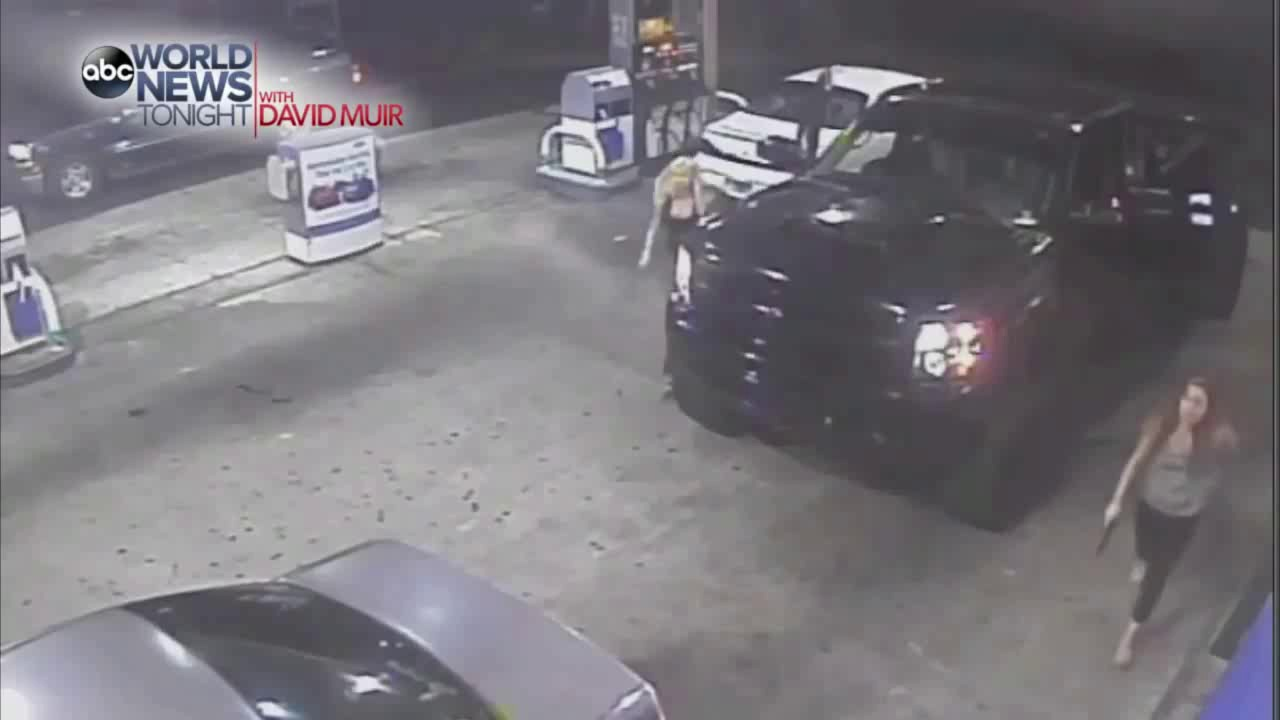

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame0.jpg: [[0.37567648 0.6243235 ]]


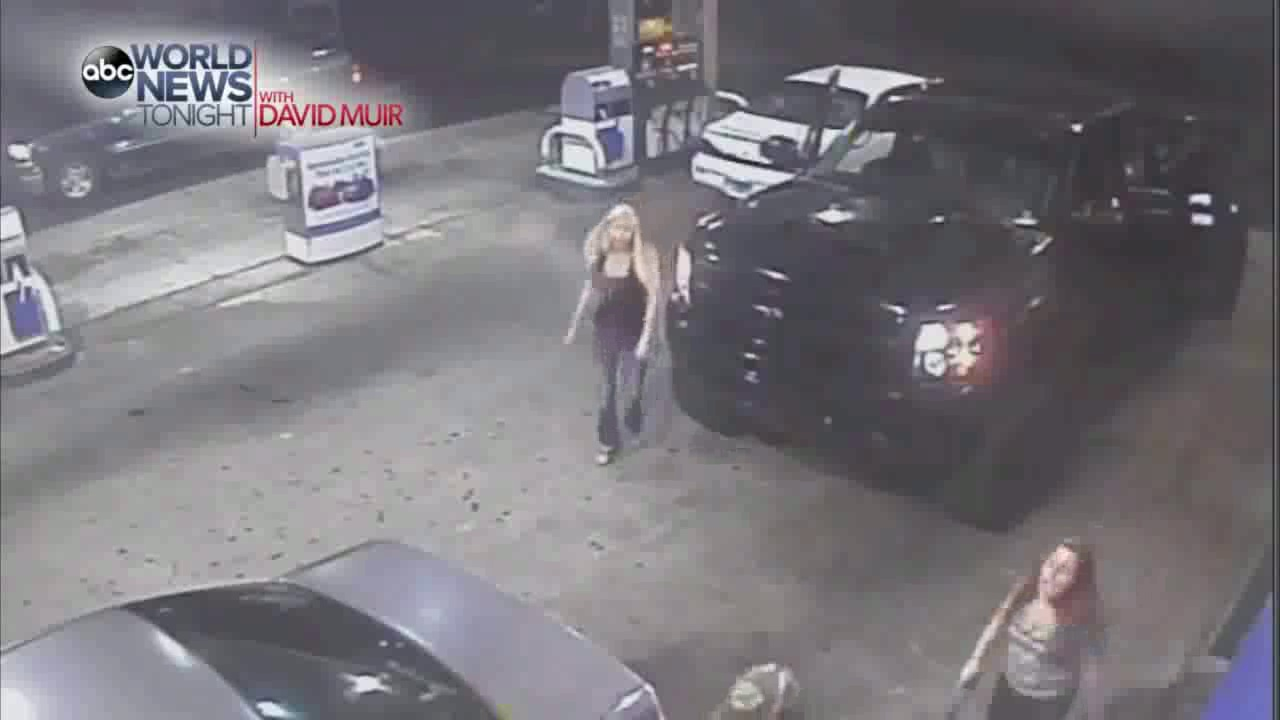

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame1.jpg: [[0.509741   0.49025896]]
Violence detected in this frame!


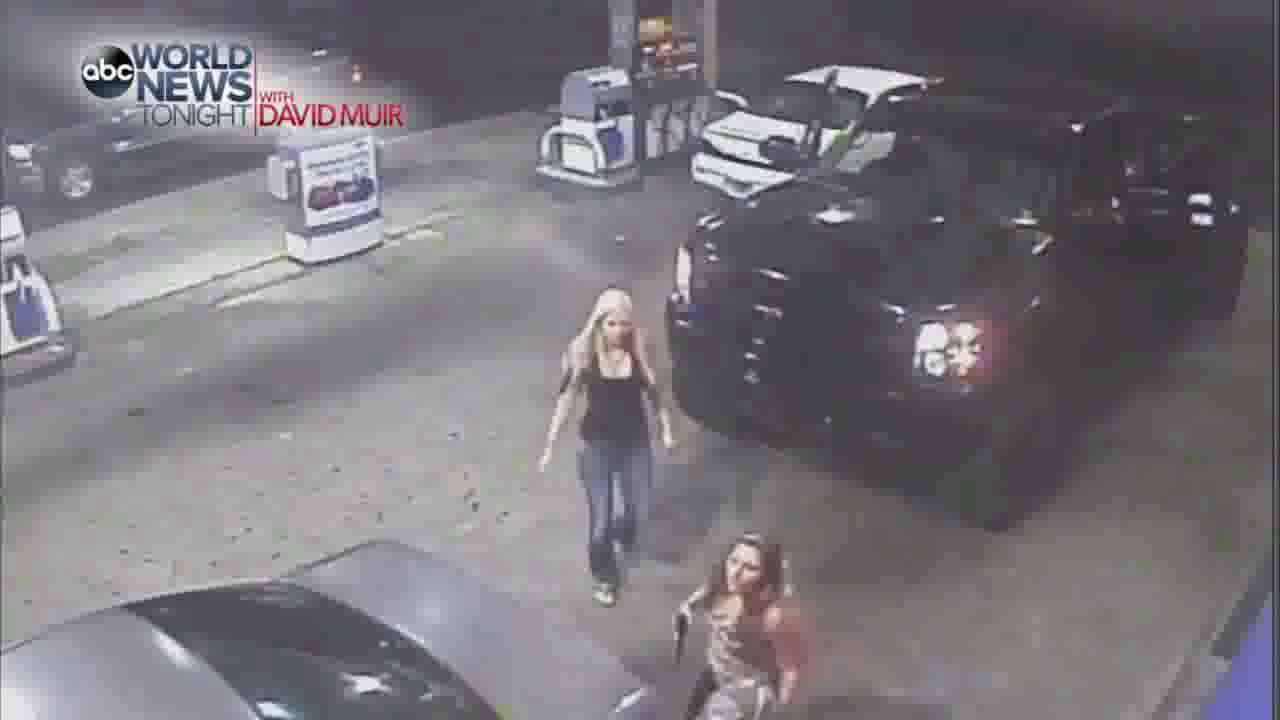

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame2.jpg: [[0.7506067  0.24939333]]
Violence detected in this frame!


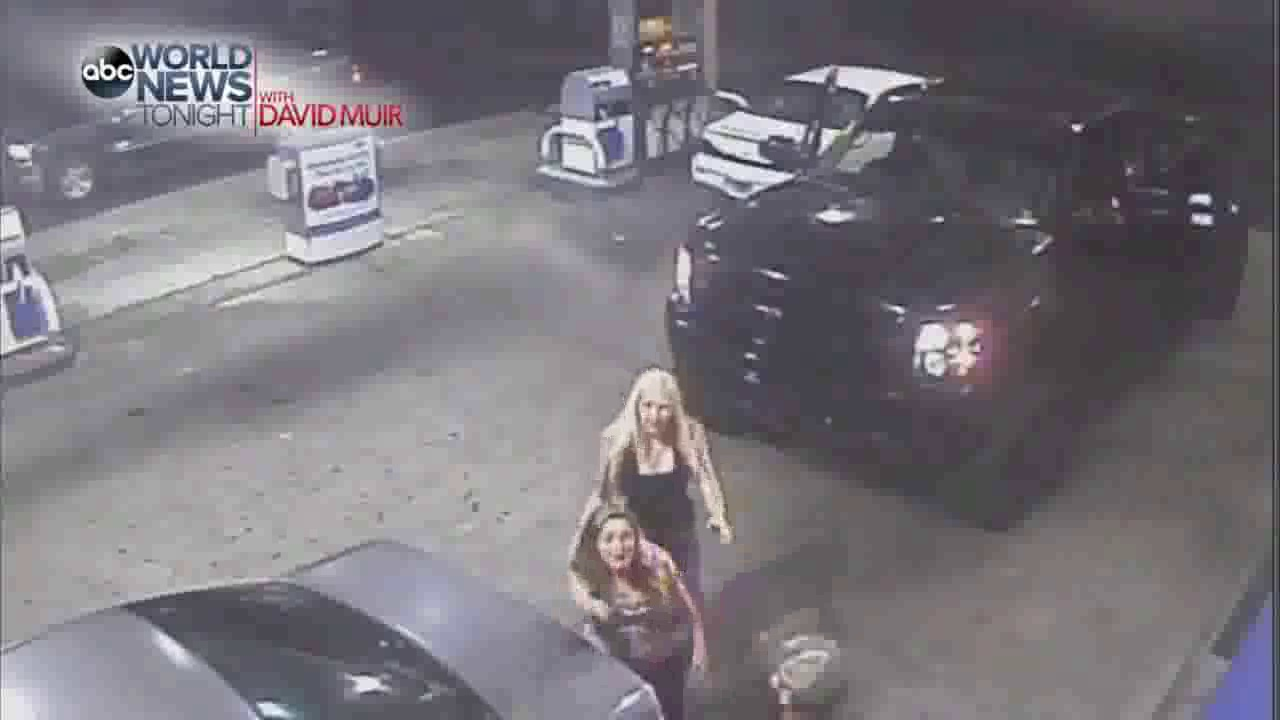

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame3.jpg: [[0.45419365 0.54580635]]


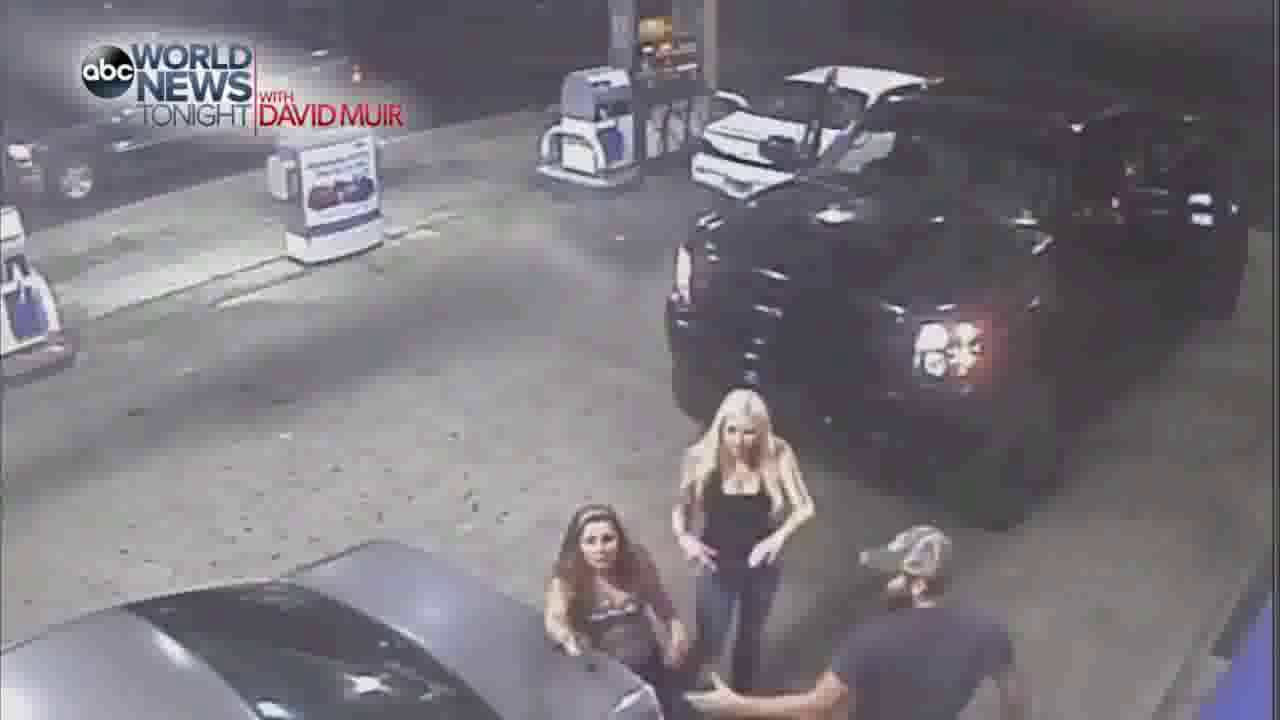

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame4.jpg: [[0.7883608  0.21163918]]
Violence detected in this frame!


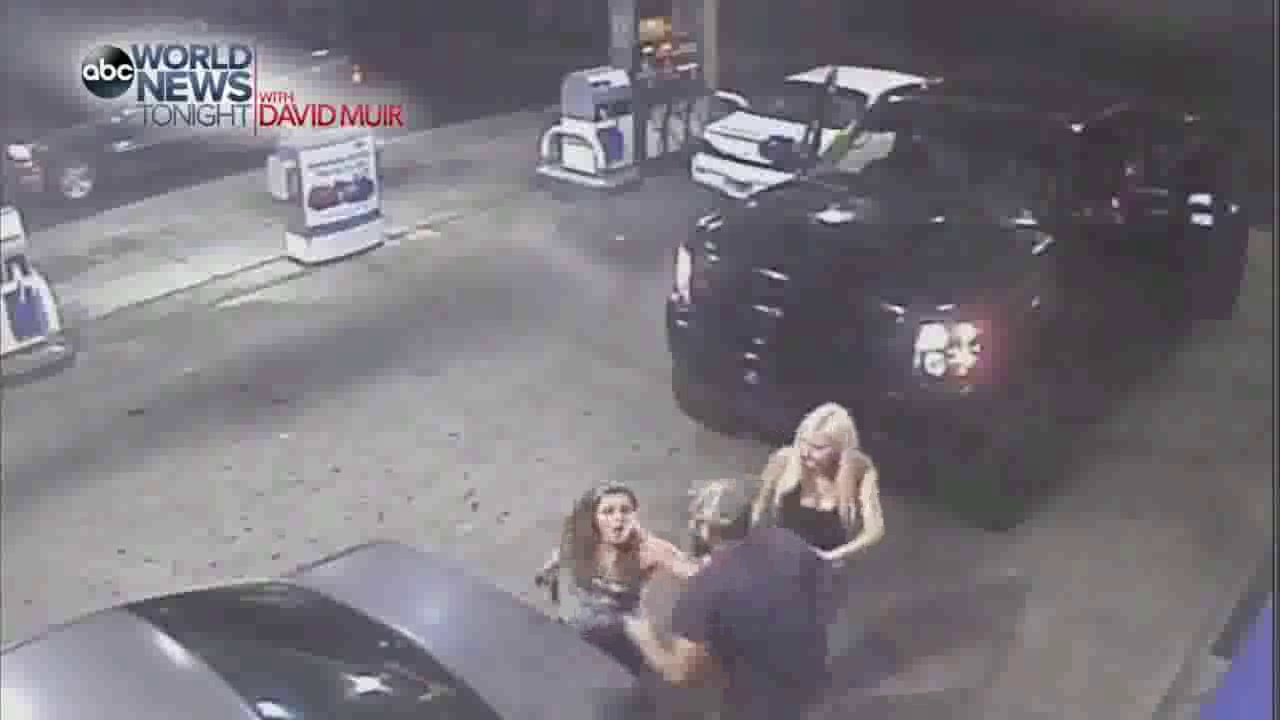

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame5.jpg: [[0.8888511  0.11114884]]
Violence detected in this frame!


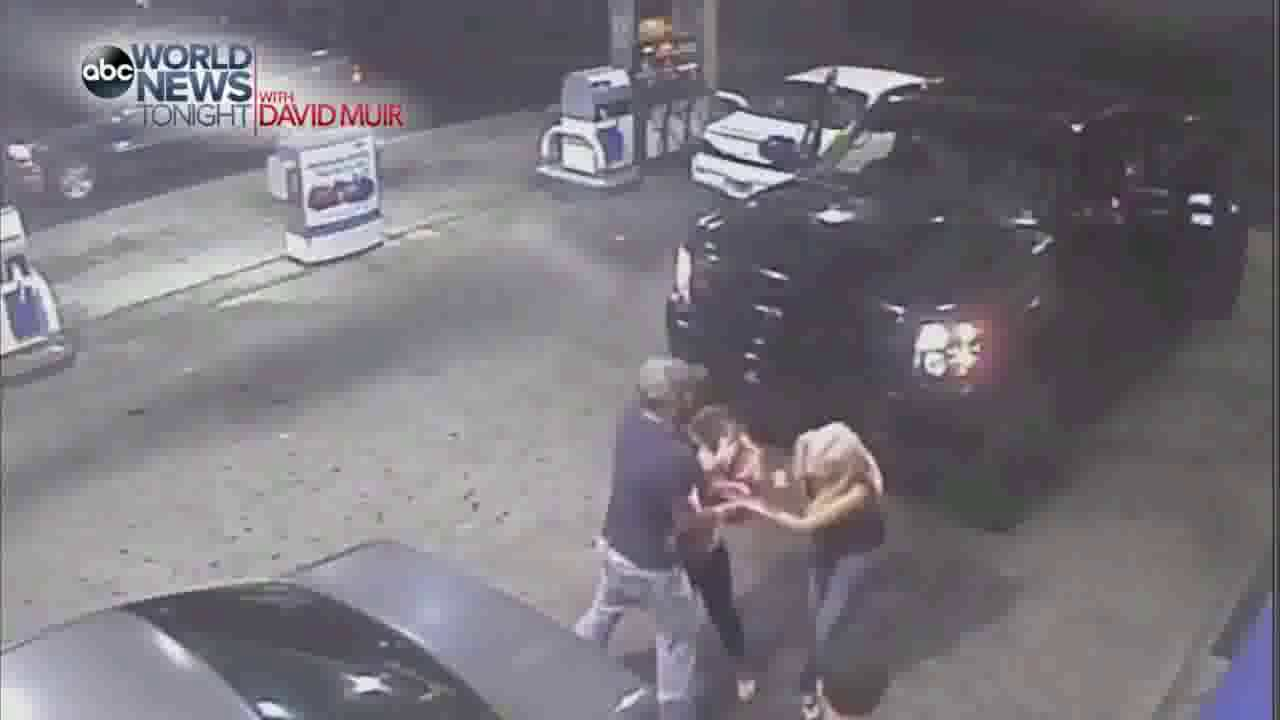

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame6.jpg: [[0.9396056  0.06039438]]
Violence detected in this frame!


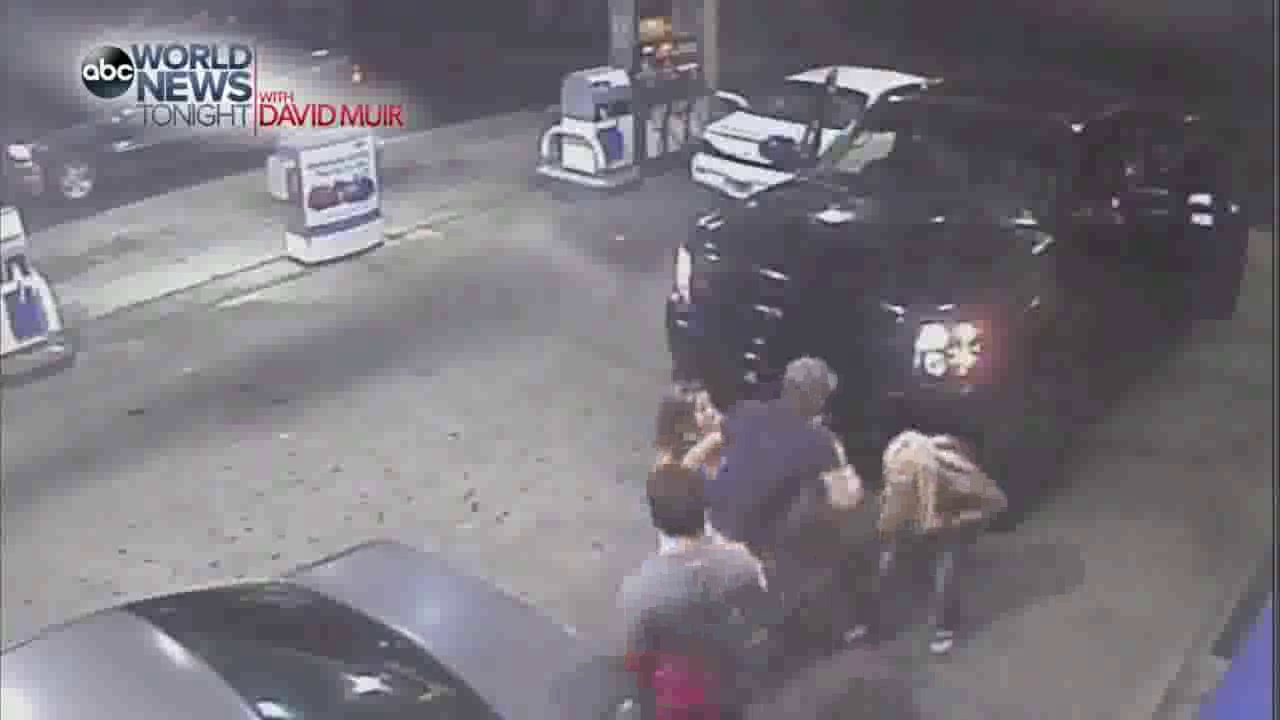

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

Frame probabilities for frames/frame7.jpg: [[0.7703305 0.2296695]]
Violence detected in this frame!
Violence detected


In [10]:
import cv2
import os
from IPython.display import Image, display
from autogluon.multimodal import download, MultiModalPredictor


def capture_frames(video_path, output_folder='frames'):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    vidObj = cv2.VideoCapture(video_path)
    count = 0
    frame_interval = 1
    fps = int(vidObj.get(cv2.CAP_PROP_FPS))
    frame_time = 1 / fps

    frame_urls = []

    while True:
        success, image = vidObj.read()

        if not success:
            break

        current_time = vidObj.get(cv2.CAP_PROP_POS_MSEC) / 1000.0

        if current_time >= count * frame_interval:
            frame_name = os.path.join(output_folder, "frame%d.jpg" % count)
            cv2.imwrite(frame_name, image)
            frame_urls.append(frame_name)
            count += 1

    vidObj.release()

    return frame_urls

if __name__ == '__main__':
    video_path = "t_w023_converted.avi"
    output_folder = "frames"

    frame_urls = capture_frames(video_path, output_folder)

    predictor = MultiModalPredictor(problem_type="zero_shot_image_classification")

    class_labels = [
        'Violence',
        'Normal'
    ]

    for frame_url in frame_urls:
        pil_img = Image(filename=frame_url)
        display(pil_img)

        prob = predictor.predict_proba({"image": [frame_url]}, {"text": class_labels})
        print(f"Frame probabilities for {frame_url}:", prob)

        violence_prob = prob[0][0]

        if violence_prob > 0.5:
            print("Violence detected in this frame!")
            score = 1


if score == 1:
    print("Violence detected")
